Libraries Imported

In [25]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import re
import requests
from bs4 import BeautifulSoup
import folium
import textwrap





import random # library for random number generation

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


import folium # plotting library

Considering zomato data set to know the restaurants in Banglore

In [26]:
df = pd.read_csv("zomato.csv")
print(df.head(10))
print(df.columns)

                                                                                                                                                                                                                                                                                                                                    url                                                                                                     address                                             name online_order book_table   rate  votes                             phone      location            rest_type                                                                                            dish_liked                                     cuisines approx_cost(for two people)                                                                                                                                                                                                                                          

Data cleaning (choosing the required columns)

In [27]:
df2 = pd.DataFrame(df[['name','online_order','book_table','rate','votes','cuisines','approx_cost(for two people)','listed_in(city)']])
print(df2.head())

                    name online_order book_table   rate  votes                        cuisines approx_cost(for two people) listed_in(city)
0                  Jalsa          Yes        Yes  4.1/5    775  North Indian, Mughlai, Chinese                         800    Banashankari
1         Spice Elephant          Yes         No  4.1/5    787     Chinese, North Indian, Thai                         800    Banashankari
2        San Churro Cafe          Yes         No  3.8/5    918          Cafe, Mexican, Italian                         800    Banashankari
3  Addhuri Udupi Bhojana           No         No  3.7/5     88      South Indian, North Indian                         300    Banashankari
4          Grand Village           No         No  3.8/5    166        North Indian, Rajasthani                         600    Banashankari


Number of restaurants in each location(city) in Bsangalore

In [28]:
num = df2.groupby(['listed_in(city)']).size()
num_res= df2.groupby(['listed_in(city)']).size().reset_index(name='counts')
print(num_res.columns)

Index(['listed_in(city)', 'counts'], dtype='object')


Bar plot of the number of restaurants in each city

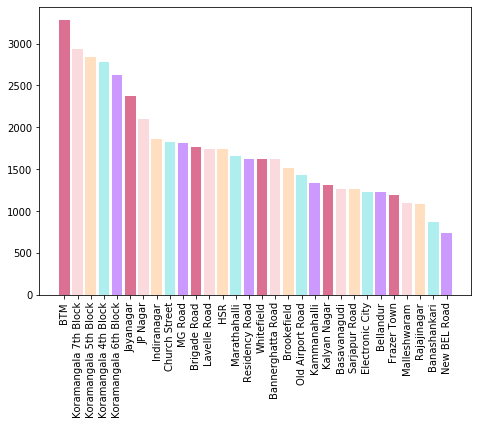

In [29]:
sorted_df = num_res.sort_values(by='counts', ascending=False)
#print(sorted_df)
x = sorted_df['listed_in(city)']
 
#width = 0.35
y = sorted_df['counts']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
colors = ['#DB7093', '#FADADD', '#FFDFBF','#AFEEEE','#CC99FF']

ax.bar(x,y, color = colors)

plt.xticks(rotation=90)


plt.show()

Number of Chinese restaurants in each city

In [30]:

#as we can see the number of restaurants are highest in btm and least in new bel road
chi = df2[df2['cuisines'].str.contains("Chinese", na=False)]

chi_num = chi.groupby(['listed_in(city)']).size()
chi_res= chi.groupby(['listed_in(city)']).size().reset_index(name='counts')
print(chi_res)

          listed_in(city)  counts
0                     BTM    1034
1            Banashankari     264
2       Bannerghatta Road     525
3            Basavanagudi     352
4               Bellandur     349
5            Brigade Road     466
6             Brookefield     499
7           Church Street     497
8         Electronic City     484
9             Frazer Town     313
10                    HSR     515
11            Indiranagar     464
12               JP Nagar     651
13              Jayanagar     735
14           Kalyan Nagar     411
15           Kammanahalli     413
16  Koramangala 4th Block     850
17  Koramangala 5th Block     896
18  Koramangala 6th Block     804
19  Koramangala 7th Block     912
20           Lavelle Road     488
21                MG Road     468
22           Malleshwaram     337
23           Marathahalli     604
24           New BEL Road     233
25       Old Airport Road     368
26            Rajajinagar     330
27         Residency Road     427
28          Sa

Bar plot of number of Chinese restaurants in each city

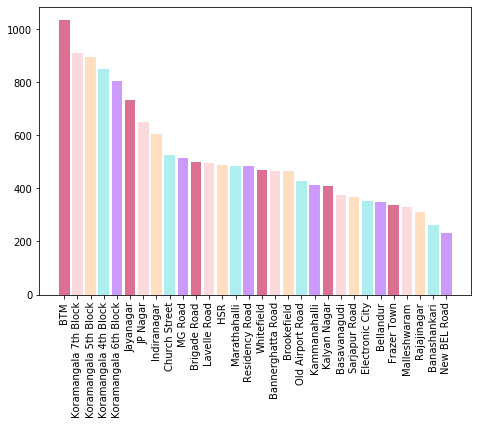

In [31]:
sorted_chi = chi_res.sort_values(by='counts', ascending=False)
#print(sorted_chi)
y = sorted_chi['counts']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
colors = ['#DB7093', '#FADADD', '#FFDFBF','#AFEEEE','#CC99FF']

ax.bar(x,y, color = colors)

plt.xticks(rotation=90)


plt.show()

Land costs of each city in Bangalore

In [32]:
#going with land costs to know more about the places 
#"https://www.99acres.com/property-rates-and-price-trends-in-bangalore" - csv file

property = pd.read_csv("property.csv")
print(property.tail())
property['min'] = property['min'].astype(int)
property['max'] = property['max'].astype(int)
property['average'] =  (property['min'] +  property['max'])/ 2
#spellings might be different hence some manual work is required

              city   min    max
241  Shivaji Nagar  9605  10328
242  Richmond Town  9648  11348
243  Richmond Road  9690  12538
244    Rajajinagar  9732  12198
245    Indiranagar  8568  13316


In [34]:
merged_df = pd.merge(chi_res, property, left_on = 'listed_in(city)', right_on = 'city', how = 'left')
print(merged_df)

          listed_in(city)  counts               city      min      max  average
0                     BTM    1034                BTM   4060.0   6998.0   5529.0
1            Banashankari     264       Banashankari   4845.0   5738.0   5291.5
2       Bannerghatta Road     525  Bannerghatta Road   4292.0   5610.0   4951.0
3            Basavanagudi     352       Basavanagudi   8798.0  11348.0  10073.0
4               Bellandur     349          Bellandur   5738.0   7055.0   6396.5
5            Brigade Road     466                NaN      NaN      NaN      NaN
6             Brookefield     499        Brookefield   5652.0   7268.0   6460.0
7           Church Street     497                NaN      NaN      NaN      NaN
8         Electronic City     484    Electronic City   3740.0   4930.0   4335.0
9             Frazer Town     313        Frazer Town   6842.0   9350.0   8096.0
10                    HSR     515                HSR   5185.0   6588.0   5886.5
11            Indiranagar     464       

Bar plot of average land cost in Bagalore

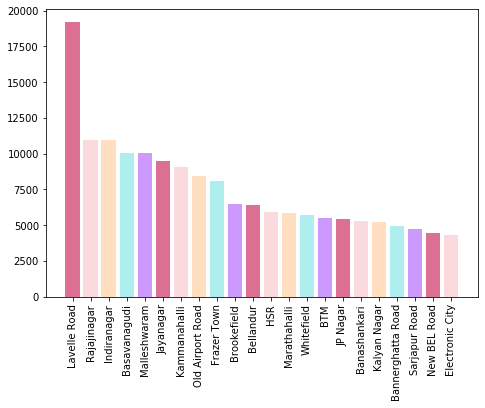

In [35]:
###plot the average land cost 
merged_df.dropna(subset =["city"], inplace = True)
land_cost = merged_df.sort_values(by='average', ascending=False)

x= land_cost["city"]
y = land_cost["average"]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
colors = ['#DB7093', '#FADADD', '#FFDFBF','#AFEEEE','#CC99FF']

ax.bar(x,y, color = colors)

plt.xticks(rotation=90)


plt.show()

Comparing the restaurants of 2 cities (Bellandur and Electronic city average approx cost for 2 people) 

In [36]:
df2.head()
df2.rename(columns = {'approx_cost(for two people)':'cost'}, inplace = True)
df2.rename(columns = {'listed_in(city)':'city'}, inplace = True)

#chi.head()
cost_ele = df2.query('city == "Electronic City"')
cost1 = cost_ele.stack().str.replace(',','').unstack()
cost1['cost'] = cost1['cost'].astype(float)
cost1.dropna(subset =["cost"], inplace = True)
food_cost1 = cost1.sort_values(by='cost', ascending=False)
food1 = (food_cost1.head(50))
average1 = food1["cost"].mean()     

cost_bel = df2.query('city == "Bellandur"')
cost2 = cost_bel.stack().str.replace(',','').unstack()
cost2['cost'] = cost2['cost'].astype(float)
cost2.dropna(subset =["cost"], inplace = True)
food_cost2 = cost2.sort_values(by='cost', ascending=False)
food2 = (food_cost2.head(50))
average2 = food2["cost"].mean()
         
print(average1)
print(average2)
#food = (food_cost.head(1))
#area_food_cost = food[["cost","city"]] 


1720.0
1762.0


Bar plot of Average cost of top 50 restaurants in Bellandur v/s in Electronic City

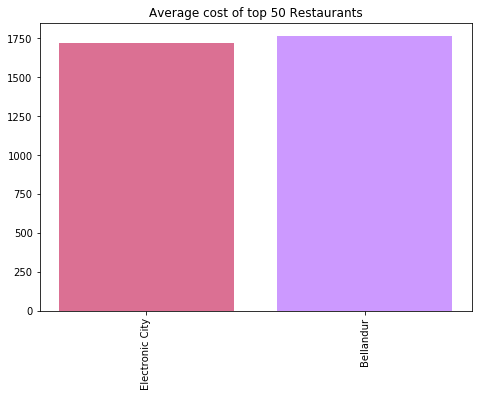

In [37]:
data = [['Electronic City', average1], ['Bellandur', average2]] 
dfam = pd.DataFrame(data, columns = ['City', 'Cost'])

x= dfam["City"]
y = dfam["Cost"]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
colors = ['#DB7093','#CC99FF']

ax.bar(x,y, color = colors)

plt.xticks(rotation=90)

plt.title("Average cost of top 50 Restaurants")
plt.show()


Exploring the places in Banglore and knowing the most famous places out of all the places with least number of restaurants and least land cost

2 very popular places Bellandur and Electronic city description was given from wiki pages 

In [38]:
res = requests.get("https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Bangalore")
soup = BeautifulSoup(res.content,'lxml')
table = soup.find_all('table') 
df = pd.read_html(str(table))
#print(df)
pd.set_option('max_colwidth', 1000)
df1 = pd.DataFrame(df[1])
df2 = pd.DataFrame(df[2])
df3 = pd.DataFrame(df[3])
df4 = pd.DataFrame(df[4])
table1 = df1.query('Name == "Bellandur" ')
table4 = df4.query('Name == "Electronic City" ')
print(table1)
print(table4)

        Name  Image                                                                                                                                                        Summary
0  Bellandur    NaN  Located along the Outer Ring Road, Bellandur is an IT hub and home to multiple tech parks/SEZs such as RMZ Ecospace. It is also known for the Bellandur Lake.
              Name  Image                                                                                                                                                                                                                                                                                                                                                                                        Summary
3  Electronic City    NaN  Nicknamed "IT capital of India" and "Silicon Valley of India", Electronic City is a large industrial area on the outskirts of the city. With hundreds of IT companies' offices located in the area, including 

Foursquare api was used to explore the Chinese  restaurants in Bangalore

In [39]:
#login credentials
CLIENT_ID = '4FZWU1LGGEHPREZIF0QH2SJORPUSDYSKSP0SBLGKHBWUOV3B' # your Foursquare ID
CLIENT_SECRET = 'TE3BP4FOTNHQZGEX3BHQEBKH0FXWYUMS42JLLHBUJGZJLFGF' # your Foursquare Secret
VERSION = '20200505'
LIMIT = 30000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4FZWU1LGGEHPREZIF0QH2SJORPUSDYSKSP0SBLGKHBWUOV3B
CLIENT_SECRET:TE3BP4FOTNHQZGEX3BHQEBKH0FXWYUMS42JLLHBUJGZJLFGF


In [40]:
#latitude and longitude values in Bagalore
address = 'Bengaluru'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

12.9791198 77.5912997


In [41]:
search_query = 'Chinese'
radius = 100000
print(search_query + ' .... OK!')

Chinese .... OK!


In [42]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=4FZWU1LGGEHPREZIF0QH2SJORPUSDYSKSP0SBLGKHBWUOV3B&client_secret=TE3BP4FOTNHQZGEX3BHQEBKH0FXWYUMS42JLLHBUJGZJLFGF&ll=12.9791198,77.5912997&v=20200505&query=Chinese&radius=100000&limit=30000'

In [43]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ebc12b114a126001b89b547'},
 'response': {'venues': [{'id': '4c029f980d0e0f47cc5d019a',
    'name': 'Chinese Hut',
    'location': {'address': 'Si apartments',
     'crossStreet': 'Palace road',
     'lat': 12.984827327734202,
     'lng': 77.58803921926643,
     'labeledLatLngs': [{'label': 'display',
       'lat': 12.984827327734202,
       'lng': 77.58803921926643}],
     'distance': 727,
     'cc': 'IN',
     'city': 'Bangalore',
     'state': 'Karnātaka',
     'country': 'India',
     'formattedAddress': ['Si apartments (Palace road)',
      'Bangalore',
      'Karnātaka',
      'India']},
    'categories': [{'id': '4bf58dd8d48988d145941735',
      'name': 'Chinese Restaurant',
      'pluralName': 'Chinese Restaurants',
      'shortName': 'Chinese',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1589383936',
    'hasPerk': False},
   {'id': '5

In [44]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe

C:\Users\Sindhu\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.city,location.state,location.country,location.formattedAddress,location.postalCode
0,4c029f980d0e0f47cc5d019a,Chinese Hut,"[{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}, 'primary': True}]",v-1589383936,False,Si apartments,Palace road,12.984827,77.588039,"[{'label': 'display', 'lat': 12.984827327734202, 'lng': 77.58803921926643}]",727,IN,Bangalore,Karnātaka,India,"[Si apartments (Palace road), Bangalore, Karnātaka, India]",NaN
1,512a1179e4b0b8fa984f28bb,Chinese Corner,"[{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}, 'primary': True}]",v-1589383936,False,NaN,NaN,12.972486,77.607101,"[{'label': 'display', 'lat': 12.97248649597168, 'lng': 77.60710144042969}]",1866,IN,NaN,NaN,India,[India],NaN
2,4c25b2daf3859c74773a6588,Three Quarter Chinese,"[{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}, 'primary': True}]",v-1589383936,False,Cosmopolitan club,"22nd Cross, Jayanagar 3rd block",12.933029,77.585215,"[{'label': 'display', 'lat': 12.933028587908323, 'lng': 77.5852148381685}]",5173,IN,Bangalore,Karnātaka,India,"[Cosmopolitan club (22nd Cross, Jayanagar 3rd block), Bangalore 560001, Karnātaka, India]",560001
3,4b5819bef964a520e64a28e3,Three Quarter Chinese,"[{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}, 'primary': True}]",v-1589383936,False,Church Street,NaN,12.974758,77.604987,"[{'label': 'display', 'lat': 12.97475760284906, 'lng': 77.60498690499921}]",1562,IN,Bangalore,Karnātaka,India,"[Church Street, Bangalore, Karnātaka, India]",NaN
4,4f4a5cbee4b0605e447969e8,chinese hut,"[{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}, 'primary': True}]",v-1589383936,False,NaN,NaN,13.004604,77.580229,"[{'label': 'display', 'lat': 13.004603715661709, 'lng': 77.58022942391973}]",3080,IN,NaN,NaN,India,[India],NaN
5,5986db032a7ab6766919dedf,Chinese Nalapaka,"[{'id': '4bf58dd8d48988d16e941735', 'name': 'Fast Food Restaurant', 'pluralName': 'Fast Food Restaurants', 'shortName': 'Fast Food', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}, 'primary': True}]",v-1589383936,False,NaN,NaN,13.004261,77.580310,"[{'label': 'display', 'lat': 13.004261, 'lng': 77.58031}]",3041,IN,Bangalore,Karnātaka,India,"[Bangalore 560003, Karnātaka, India]",560003
6,563de8b3cd10e06a3abae928,Chinese Nalapaka,"[{'id': '54135bf5e4b08f3d2429dfdf', 'name': 'Indian Chinese Restaurant', 'pluralName': 'Indian Chinese Restaurants', 'shortName': 'Indian Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}, 'primary': True}]",v-1589383936,False,NaN,NaN,13.006983,77.595054,"[{'label': 'display', 'lat': 13.006983168020094, 'lng': 77.59505407068745}]",3128,IN,NaN,NaN,India,[India],NaN
7,4f622795e4b0b665d031a461,New Chinese rolls,"[{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}, 'primary': True}]",v-1589383936,False,NaN,NaN,13.04

In [45]:
dataframe.shape
print(dataframe)

                          id                                     name                                                                                                                                                                                                                                                              categories    referralId  hasPerk                          location.address               location.crossStreet  location.lat  location.lng                                                      location.labeledLatLngs  location.distance location.cc    location.city location.state location.country                                                                   location.formattedAddress location.postalCode
0   4c029f980d0e0f47cc5d019a                              Chinese Hut                            [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/

In [46]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,postalCode,id
0,Chinese Hut,Chinese Restaurant,Si apartments,Palace road,12.984827,77.588039,"[{'label': 'display', 'lat': 12.984827327734202, 'lng': 77.58803921926643}]",727,IN,Bangalore,Karnātaka,India,"[Si apartments (Palace road), Bangalore, Karnātaka, India]",NaN,4c029f980d0e0f47cc5d019a
1,Chinese Corner,Chinese Restaurant,NaN,NaN,12.972486,77.607101,"[{'label': 'display', 'lat': 12.97248649597168, 'lng': 77.60710144042969}]",1866,IN,NaN,NaN,India,[India],NaN,512a1179e4b0b8fa984f28bb
2,Three Quarter Chinese,Chinese Restaurant,Cosmopolitan club,"22nd Cross, Jayanagar 3rd block",12.933029,77.585215,"[{'label': 'display', 'lat': 12.933028587908323, 'lng': 77.5852148381685}]",5173,IN,Bangalore,Karnātaka,India,"[Cosmopolitan club (22nd Cross, Jayanagar 3rd block), Bangalore 560001, Karnātaka, India]",560001,4c25b2daf3859c74773a6588
3,Three Quarter Chinese,Chinese Restaurant,Church Street,NaN,12.974758,77.604987,"[{'label': 'display', 'lat': 12.97475760284906, 'lng': 77.60498690499921}]",1562,IN,Bangalore,Karnātaka,India,"[Church Street, Bangalore, Karnātaka, India]",NaN,4b5819bef964a520e64a28e3
4,chinese hut,Chinese Restaurant,NaN,NaN,13.004604,77.580229,"[{'label': 'display', 'lat': 13.004603715661709, 'lng': 77.58022942391973}]",3080,IN,NaN,NaN,India,[India],NaN,4f4a5cbee4b0605e447969e8
5,Chinese Nalapaka,Fast Food Restaurant,NaN,NaN,13.004261,77.580310,"[{'label': 'display', 'lat': 13.004261, 'lng': 77.58031}]",3041,IN,Bangalore,Karnātaka,India,"[Bangalore 560003, Karnātaka, India]",560003,5986db032a7ab6766919dedf
6,Chinese Nalapaka,Indian Chinese Restaurant,NaN,NaN,13.006983,77.595054,"[{'label': 'display', 'lat': 13.006983168020094, 'lng': 77.59505407068745}]",3128,IN,NaN,NaN,India,[India],NaN,563de8b3cd10e06a3abae928
7,New Chinese rolls,Chinese Restaurant,NaN,NaN,13.044148,77.577661,"[{'label': 'display', 'lat': 13.044147829738096, 'lng': 77.57766111323177}]",7388,IN,NaN,NaN,India,[India],NaN,4f622795e4b0b665d031a461
8,3654 Chinese Hut,Chinese Restaurant,opposite R.V. Dental college,j.p.nagar 2nd phase,12.911940,77.586161,"[{'label': 'display', 'lat': 12.911939759797354, 'lng': 77.58616070306971}]",7499,IN,Bangalore,Karnātaka,India,"[opposite R.V. Dental college (j.p.nagar 2nd phase), Bangalore, Karnātaka, India]",NaN,4d47bd970bfd548191423600
9,Green Onion Chinese Restaurant,Chinese Restaurant,Residency cross road,NaN,12.973165,77.609159,"[{'label': 'display', 'lat': 12.973165470207077, 'lng': 77.60915869834479}]",2047,IN,Bangalore,Karnātaka,India,"[Residency cross road, Bangalore, Karnātaka, India]",NaN,4c0d263685e19521703beea5


folium maps to represent the restaurants in bangalore

In [47]:


venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Banglore',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the chinese restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map